Submitted by: Nicholas Foster  
email: nkfoster at gmail dot com

The following is a quick exploration of data from one month of sneaker sales from 100 shops. The data is loaded as a CSV.

In [1]:
import pandas as pd

In [2]:
file = "2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv"

In [3]:
shoe_df = pd.read_csv(file)

In [4]:
shoe_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
# Check for nan in the data. There doesn't look like there are any.
shoe_df.count()

order_id          5000
shop_id           5000
user_id           5000
order_amount      5000
total_items       5000
payment_method    5000
created_at        5000
dtype: int64

# Initial Summary Statistics

In [6]:
shoe_df["order_amount"].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The mean of the order amounts is 3,145.13. The standard deviation is large.

# Look for Ouliers

The follow is a histogram of the order amounts in order to get a sense of the distribution of the data.

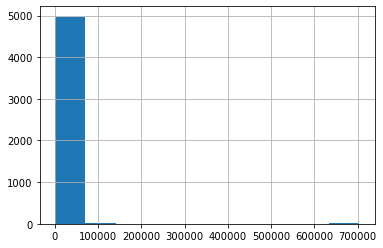

In [7]:
shoe_df["order_amount"].hist();

Here is a look at the values that are below 1000.

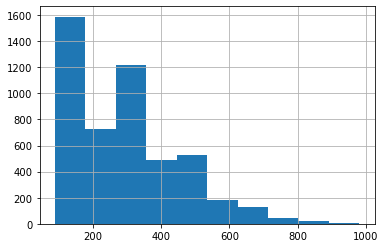

In [8]:
shoe_df[shoe_df["order_amount"] < 1000]["order_amount"].hist();

Here is a look at the values greater than 1000.

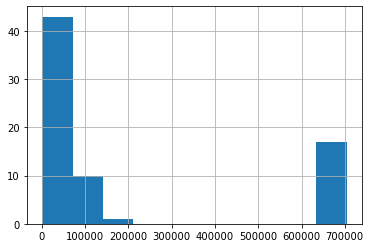

In [9]:
shoe_df[shoe_df["order_amount"] >= 1000]["order_amount"].hist();

## Look for Patterns

In [10]:
shoe_df[shoe_df["order_amount"] >= 1000].sample(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06
2512,2513,78,935,51450,2,debit,2017-03-18 18:57:13
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
2922,2923,78,740,25725,1,debit,2017-03-12 20:10:58
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
3167,3168,78,927,51450,2,cash,2017-03-12 12:23:08


The shops with id 42 and 78 are interesting. As well as the customer with id 607.

### User 607 Orders Large Amounts

In [11]:
shop42_df = shoe_df[shoe_df["shop_id"] == 42]
shop42_df.sample(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
3998,3999,42,886,352,1,debit,2017-03-09 20:10:41
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4767,4768,42,720,704,2,credit_card,2017-03-14 10:26:08
835,836,42,819,704,2,cash,2017-03-09 14:15:15


In [12]:
shop42_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,51.000000,51.0,51.000000,51.000000,51.000000
mean,2441.921569,42.0,758.588235,235101.490196,667.901961
std,1484.456801,0.0,125.993044,334860.641587,951.308641
min,16.000000,42.0,607.000000,352.000000,1.000000
25%,1366.500000,42.0,607.000000,352.000000,1.000000
50%,2154.000000,42.0,770.000000,704.000000,2.000000
75%,3801.000000,42.0,863.500000,704000.000000,2000.000000
max,4883.000000,42.0,975.000000,704000.000000,2000.000000


Both the total items numbers are off. Let's take a close look

In [13]:
shop42_df[shop42_df["total_items"] > 5].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


In [14]:
shop42_df[shop42_df["total_items"] > 5]["user_id"].unique()

array([607])

User 607 is ordering large amounts of shoes from shop 42.

In [15]:
user607_df = shoe_df[shoe_df["user_id"] == 607]
user607_df.sample(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00


User 607 appears to regularly purchase 2000 pairs of shoes.

### Shop 78 has High Priced Shoes

In [16]:
shop78_df = shoe_df[shoe_df["shop_id"] == 78]
shop78_df.sample(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3101,3102,78,855,51450,2,credit_card,2017-03-21 5:10:34
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05
3085,3086,78,910,25725,1,cash,2017-03-26 1:59:27
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46
4311,4312,78,960,51450,2,debit,2017-03-01 3:02:10


In [17]:
shop78_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,46.000000,46.0,46.000000,46.000000,46.000000
mean,2663.021739,78.0,867.739130,49213.043478,1.913043
std,1338.520020,0.0,81.314871,26472.227449,1.029047
min,161.000000,78.0,707.000000,25725.000000,1.000000
25%,1428.250000,78.0,812.500000,25725.000000,1.000000
50%,2796.500000,78.0,866.500000,51450.000000,2.000000
75%,3720.250000,78.0,935.750000,51450.000000,2.000000
max,4919.000000,78.0,997.000000,154350.000000,6.000000


In [18]:
# Find shoe price
(shop78_df["order_amount"] / shop78_df["total_items"]).unique()

array([25725.])

This shop must sell luxury shoes.

# Reexamine Summary Statistics

Let's remove user 607 and shop 78

In [19]:
shoe_df[(shoe_df["shop_id"] != 78) & (shoe_df["user_id"] != 607)][
    "order_amount"
].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

The mean and standard deviation are both now closer to expectation. Interestingly the median hasn't changed.